In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# load rankings data here:
wood_df = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
print(wood_df.Supplier.unique())
print(wood_df.Supplier.count())
wood_df.head()

['CCI' 'Intamin' 'Dinn/PTC-Schmeck' 'Gravity Group' 'GCII'
 'Rocky Mountain' 'KECO' 'Custom Coasters' 'Dinn-PTC/Schmeck'
 'Great Coasters Int.' 'Prior & Church/Looff' 'PTC/Miller' 'Vettel/Miller'
 'PTC/Schmeck' 'Keenan/Baker' 'Phare' 'Wright, Blackpool' 'Vettel'
 'PTC/Allen' 'Knoebels' 'PTC/Hoover' 'Fetterman/Knoebels'
 'M&V/The Gravity Group' 'M&V/Gravity Group' nan 'Paige'
 'PTC/Schmeck-Dinn' 'Miller' 'L.A. Thompson' 'Vettel/NAD' 'Allen/PTC'
 'Summers-KECO' 'PTC/Miller/Dinn']
179


,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [8]:
steel_df = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
print(steel_df.Supplier.unique())
steel_df.head()

['Intamin' 'B&M' 'Rocky Mountain' 'Arrow' 'Morgan' 'Mack' 'RMC'
 'Schwarzkopf' 'Schwarz' 'Lagoon' 'Chance' 'Vekoma' 'Premier'
 'Morgan/Arrow' 'Zierer']


,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


In [9]:
#plot the rank of one coaster over time
def plot_coaster_ranking(coaster_name, park_name, rankings_df):
    coaster_rankings = rankings_df[(rankings_df['Name'] == coaster_name) & (rankings_df['Park'] == park_name)]
    fig, ax = plt.subplots()
    ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'])
    ax.set_yticks(coaster_rankings['Rank'].values)
    ax.set_xticks(coaster_rankings['Year of Rank'].values)
    ax.invert_yaxis()
    plt.title('{} Rankings'.format(coaster_name))
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.show()

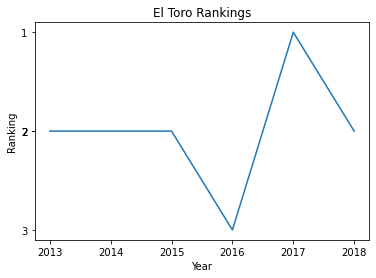

<Figure size 432x288 with 0 Axes>

In [12]:
plot_coaster_ranking('El Toro', 'Six Flags Great Adventure', wood_df)
plt.clf()

In [16]:
#plot the rank of two coasters over time
def plot_2_coaster_rankings(coaster_1_name, coaster_1_park, coaster_2_name, coaster_2_park, rankings_df):
    coaster_1_rankings = rankings_df[(rankings_df['Name'] == coaster_1_name) & (rankings_df['Park'] == coaster_1_park)]
    coaster_2_rankings = rankings_df[(rankings_df['Name'] == coaster_2_name) & (rankings_df['Park'] == coaster_2_park)]
    fig, ax = plt.subplots()
    ax.plot(coaster_1_rankings['Year of Rank'], coaster_1_rankings['Rank'], color = 'purple', label = coaster_1_name)
    ax.plot(coaster_2_rankings['Year of Rank'], coaster_2_rankings['Rank'], color = 'teal', label = coaster_2_name)
    ax.invert_yaxis()
    plt.title('{} vs. {} Rankings'.format(coaster_1_name, coaster_2_name))
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend()
    plt.show()

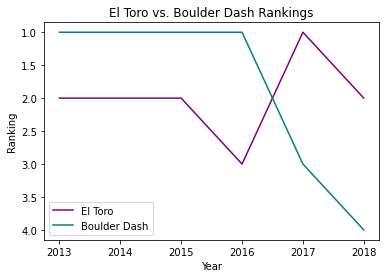

<Figure size 432x288 with 0 Axes>

In [17]:
plot_2_coaster_rankings('El Toro','Six Flags Great Adventure','Boulder Dash','Lake Compounce',wood_df)
plt.clf()

In [18]:
#plot the ranking of the top n rankings over time
def plot_top_n(rankings_df,n):
  top_n_rankings = rankings_df[rankings_df['Rank'] <= n]
  fig, ax = plt.subplots(figsize = (10,10))
  for coaster in set(top_n_rankings['Name']):
    coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
    ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'], label=coaster)
  ax.set_yticks([i for i in range(1,6)])
  ax.invert_yaxis()
  plt.title("Top 10 Rankings")
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.legend(loc=4)
  plt.show()

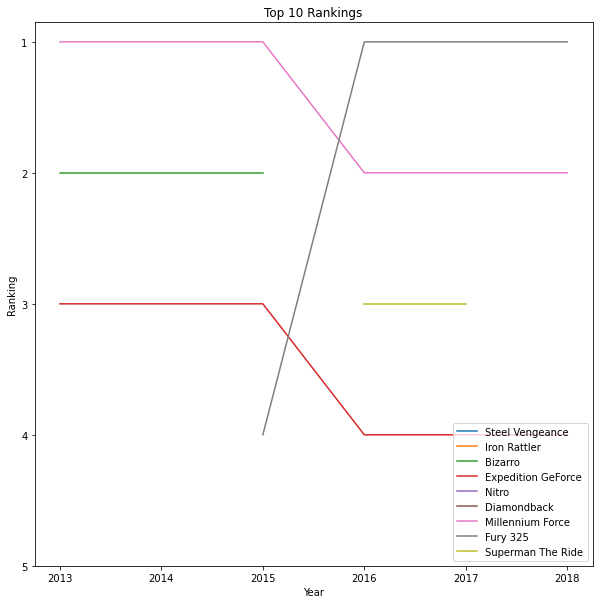

<Figure size 432x288 with 0 Axes>

In [20]:
plot_top_n(steel_df, 4)
plt.clf()

In [22]:
#load Captain Coaster data
roller_coasters = pd.read_csv('roller_coasters.csv')
roller_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [28]:
#plot a histogram of any numeric column of Captain Coaster data
def plot_numeric_roller_coaster_data(coaster_df, column_name):
    plt.hist(coaster_df[column_name].dropna(), color = 'orange')
    plt.title('Histogram of Roller Coaster {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()

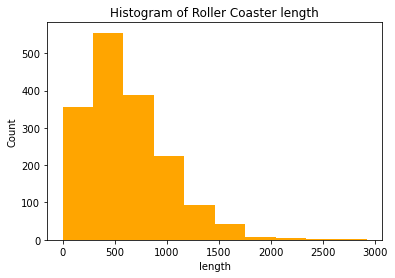

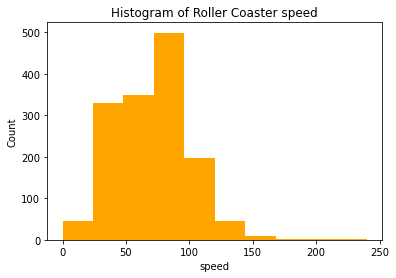

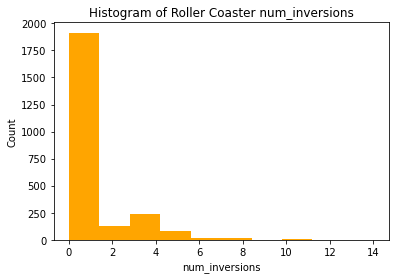

<Figure size 432x288 with 0 Axes>

In [34]:
plot_numeric_roller_coaster_data(roller_coasters, 'length')
plt.clf()
plot_numeric_roller_coaster_data(roller_coasters, 'speed')
plt.clf()
plot_numeric_roller_coaster_data(roller_coasters, 'num_inversions')
plt.clf()

In [39]:
#plot bar chart showing number of inversions for each roller coaster in a given park
def plot_bar_inversions(coaster_df, park_name):
    park_coasters = coaster_df[coaster_df['park'] == park_name]
    park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
    coaster_names = park_coasters['name']
    number_inversions = park_coasters['num_inversions']
    plt.bar(range(len(number_inversions)),number_inversions)
    ax1 = plt.subplot()
    ax1.set_xticks(range(len(coaster_names)))
    ax1.set_xticklabels(coaster_names,rotation=90)
    plt.title('Number of Inversions Per Coaster at {}'.format(park_name))
    plt.xlabel('Roller Coaster')
    plt.ylabel('# of Inversions')
    plt.show()

<ipython-input-39-3b8a07e388fc>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot()


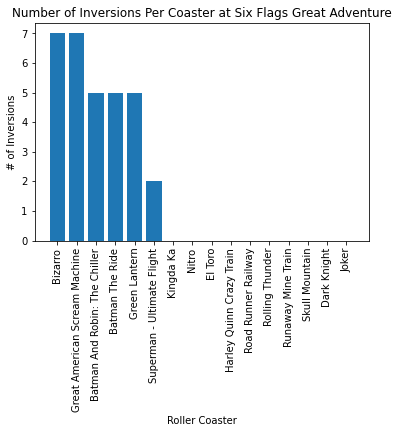

<Figure size 432x288 with 0 Axes>

In [40]:
plot_bar_inversions(roller_coasters, 'Six Flags Great Adventure')
plt.clf()

In [41]:
#plot a pie chart that compares operating coasters to closed coasters
def pie_chart_status(coaster_df):
  operating_coasters = coaster_df[coaster_df['status'] == 'status.operating']
  closed_coasters = coaster_df[coaster_df['status'] == 'status.closed.definitely']
  num_operating_coasters = len(operating_coasters)
  num_closed_coasters = len(closed_coasters)
  status_counts = [num_operating_coasters,num_closed_coasters]
  plt.pie(status_counts,autopct='%0.1f%%',labels=['Operating','Closed'])
  plt.axis('equal')
  plt.show()

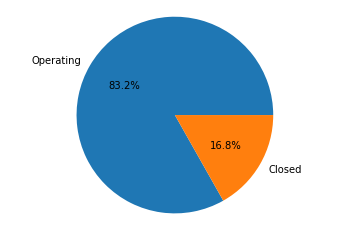

<Figure size 432x288 with 0 Axes>

In [42]:
pie_chart_status(roller_coasters)
plt.clf()

In [43]:
#plot a scatterplot to compare 2 numeric columns
def plot_scatter(coaster_df, column_x, column_y):
  plt.scatter(coaster_df[column_x],coaster_df[column_y])
  plt.title('Scatter Plot of {} vs. {}'.format(column_y,column_x))
  plt.xlabel(column_x)
  plt.ylabel(column_y)
  plt.show()

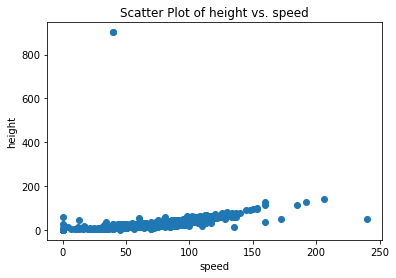

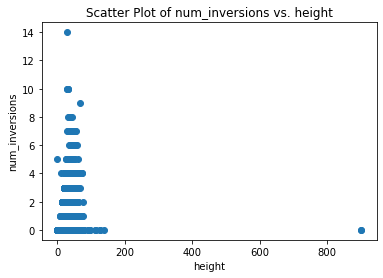

<Figure size 432x288 with 0 Axes>

In [45]:
plot_scatter(roller_coasters, 'speed', 'height')
plt.clf()
plot_scatter(roller_coasters, 'height', 'num_inversions')
plt.clf()